In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import expon

In [3]:
plt.style.use("fivethirtyeight")

In [41]:
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]

In [4]:
df = pd.read_csv('data/DBtrainrides.csv.zip', compression='zip')
df.head()

,ID,line,path,eva_nr,category,station,state,city,zip,long,lat,arrival_plan,departure_plan,arrival_change,departure_change,arrival_delay_m,departure_delay_m,info,arrival_delay_check,departure_delay_check
0,1573967790757085557-2407072312-14,20,Stolberg(Rheinl)Hbf Gl.44|Eschweiler-St.Jöris|...,8000001,2,Aachen Hbf,Nordrhein-Westfalen,Aachen,52064,6.091499,50.767800,2024-07-08 00:00:00,2024-07-08 00:01:00,2024-07-08 00:03:00,2024-07-08 00:04:00,3,3,NaN,on_time,on_time
1,349781417030375472-2407080017-1,18,NaN,8000001,2,Aachen Hbf,Nordrhein-Westfalen,Aachen,52064,6.091499,50.767800,NaN,2024-07-08 00:17:00,NaN,NaN,0,0,NaN,on_time,on_time
2,7157250219775883918-2407072120-25,1,Hamm(Westf)Hbf|Kamen|Kamen-Methler|Dortmund-Ku...,8000406,4,Aachen-Rothe Erde,Nordrhein-Westfalen,Aachen,52066,6.116475,50.770202,2024-07-08 00:03:00,2024-07-08 00:04:00,2024-07-08 00:03:00,2024-07-08 00:04:00,0,0,NaN,on_time,on_time
3,349781417030375472-2407080017-2,18,Aachen Hbf,8000404,5,Aachen West,Nordrhein-Westfalen,Aachen,52072,6.070715,50.780360,2024-07-08 00:20:00,2024-07-08 00:21:00,NaN,NaN,0,0,NaN,on_time,on_time
4,1983158592123451570-2407080010-3,33,Herzogenrath|Kohlscheid,8000404,5,Aachen West,Nordrhein-Westfalen,Aachen,52072,6.070715,50.780360,2024-07-08 00:20:00,2024-07-08 00:21:00,2024-07-08 00:20:00,2024-07-08 00:21:00,0,0,NaN,on_time,on_time


In [5]:
df.arrival_delay_check.value_counts()

arrival_delay_check
on_time    1950404
delay       110953
Name: count, dtype: int64

In [ ]:
arrival_delay_min = df.loc[df.arrival_delay_check == 'delay', 'arrival_delay_m']

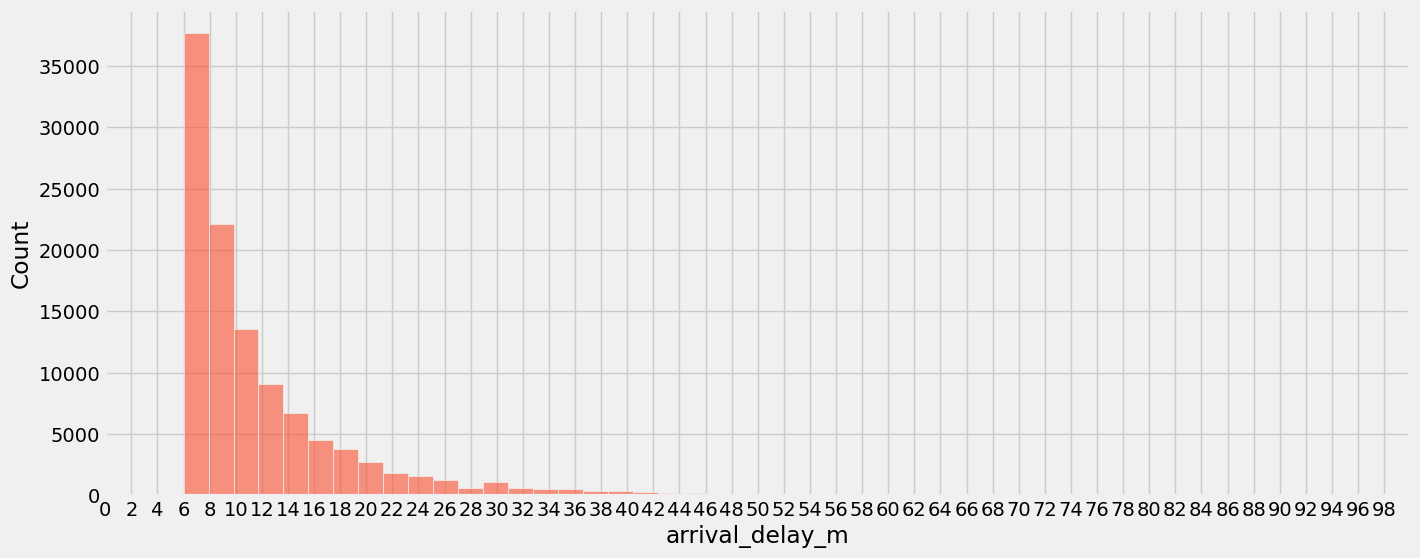

In [44]:
plt.figure(figsize=(15, 6))
sns.histplot(arrival_delay_min, bins=80, color=colors[1], alpha=0.6);
plt.xticks(range(0, 100, 2));
plt.xlim(0, 100);

In [7]:
arrival_delay_min.describe().round(2)

count    110953.00
mean         11.95
std           8.44
min           6.00
25%           7.00
50%           9.00
75%          14.00
max         159.00
Name: arrival_delay_m, dtype: float64

In [8]:
start = arrival_delay_min.min()
scale = arrival_delay_min.mean() - start
rv = expon(loc=start, scale=scale)
print(f"Erwartungswert: {rv.mean():.2f}, Varianz: {rv.var():.2f}")

Erwartungswert: 11.95, Varianz: 35.46


In [9]:
x = np.linspace(0, arrival_delay_min.max(), 500)

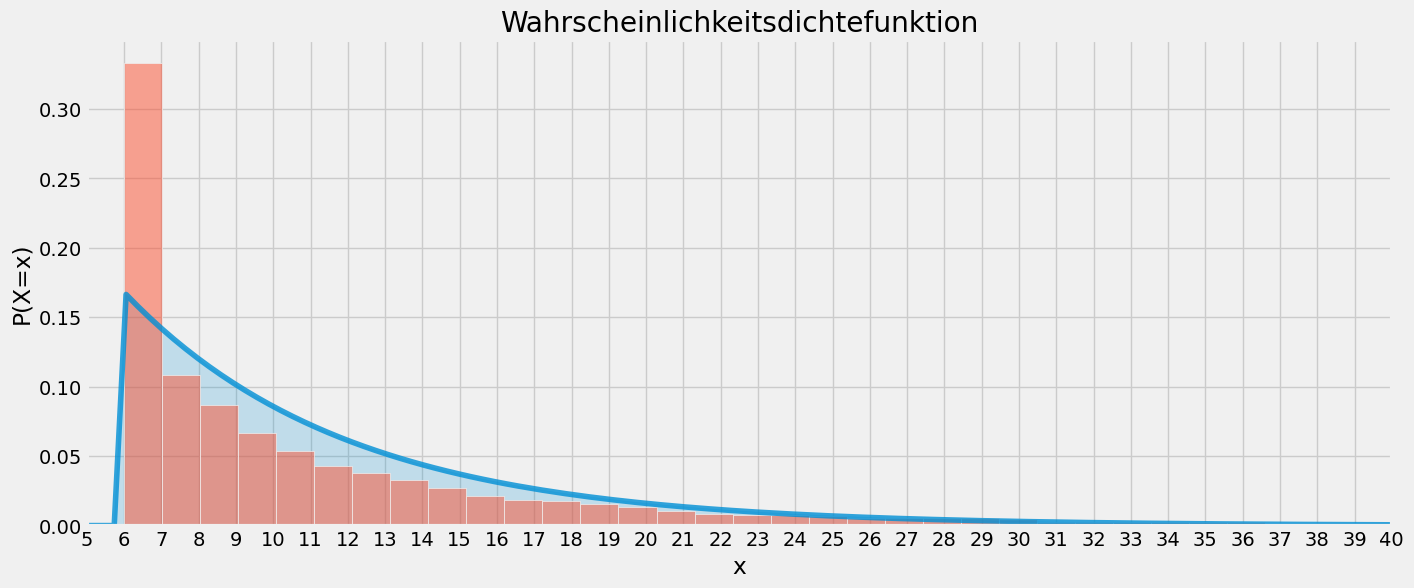

In [42]:
plt.figure(figsize=(15, 6))
plt.plot(x, rv.pdf(x), alpha=0.8, color=colors[0])
plt.fill_between(x, rv.pdf(x), alpha=0.2, color=colors[0])
sns.histplot(arrival_delay_min, bins=150, alpha=0.5, stat='density', color=colors[1]);
plt.xlabel('x')
plt.ylabel('P(X=x)')
plt.title('Wahrscheinlichkeitsdichtefunktion')
plt.xlim(5, 40)
plt.xticks(range(5, 41, 1))
plt.show()

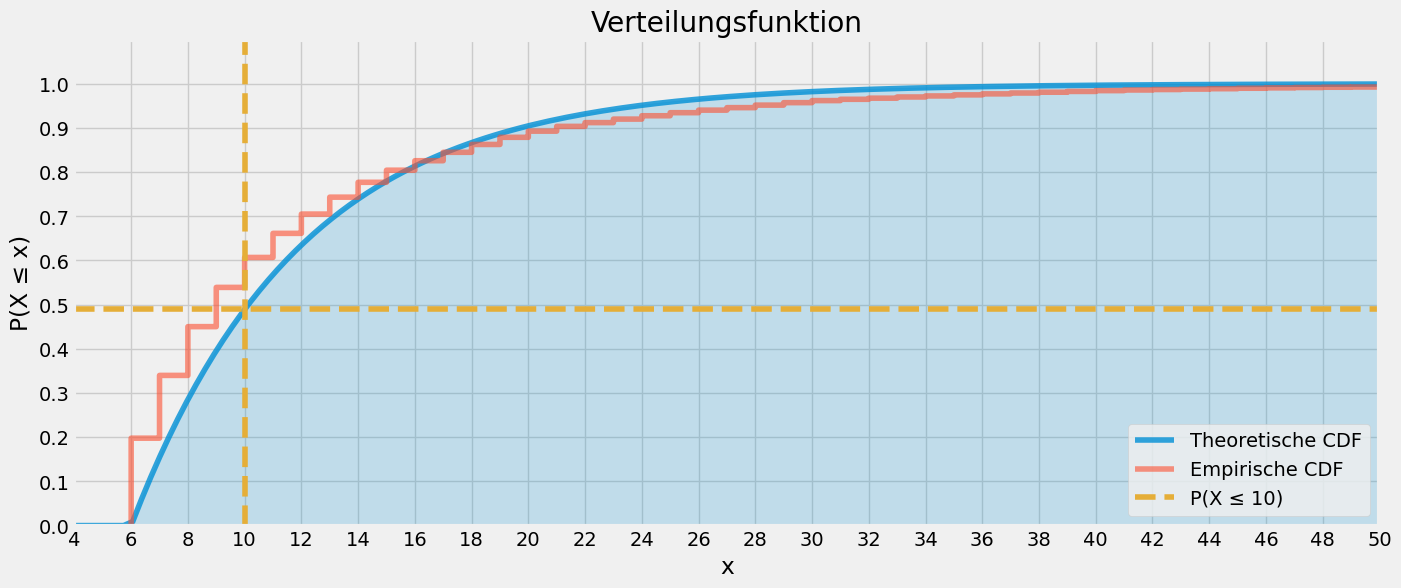

In [43]:
plt.figure(figsize=(15, 6))
plt.plot(x, rv.cdf(x), label='Theoretische CDF', alpha=0.8, color=colors[0])
plt.fill_between(x, rv.cdf(x), alpha=0.2, color=colors[0])
sns.ecdfplot(arrival_delay_min, label='Empirische CDF', alpha=0.6, color=colors[1])
plt.axhline(rv.cdf(10), linestyle='--', label='P(X ≤ 10)', color=colors[2])
plt.axvline(10, linestyle='--', color=colors[2])
plt.xlim(5, 50)
plt.xticks(range(4, 52, 2))
plt.xlabel('x')
plt.ylabel('P(X ≤ x)')
plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylim(0, 1.1)
plt.title('Verteilungsfunktion')
plt.legend()
plt.show()

$$X = \{\text{Verspätung (in Minuten) unter der Bedingung dass der Zug verspätet ist}\}$$

$$ \mathbb{E}[X] = 11.95, \quad \text{Var}(X)=35.46$$

Da die Verteilung um 6 Minuten nach rechts verschoben ist:

$$\lambda = \frac{1}{\mathbb{E}[X] - 6} = \frac{1}{11.95 - 6} = 0.16$$

Wahrscheinlichkeitsdichtefunktion:

$$
f_X(x) = 
\begin{cases}
\lambda \cdot e^{-\lambda (x - 6)}, & \text{wenn } x \geq 6\\
0, & \text{wenn } x < 6
\end{cases}
$$

Verteilungsfunktion:

$$
F_X(x) = 
\begin{cases}
1 - e^{-\lambda (x - 6)}, & \text{wenn } x \geq 6\\
0, & \text{wenn } x < 6
\end{cases}
$$

Für $x=10$:
$$F_X(10) = 1 - e^{-0.16*(10-6)} = 48.92\%$$

> Das heißt, die Wahrscheinlichkeit, dass sich ein verspäteter Zug höchstens um 10 Minuten verspätet, liegt bei etwa 48.92 %.

In [12]:
theo_p = rv.cdf(10)
print(f'Theoretisch P(X ≤ 10): {theo_p*100:.2f}%')

emp_p = (arrival_delay_min <= 10).mean()
print(f'Empirisch P(X ≤ 10): {emp_p*100:.2f}%')

Theoretisch P(X ≤ 10): 48.92%
Empirisch P(X ≤ 10): 60.69%
